In [179]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [180]:
#data preparation

In [181]:
Data=[[[(i+j)*(i+j)/10000] for i in range(5)] for j in range(100)]
target=[(i+5)*(i+5)/10000 for i in range(100)]

In [182]:
Data



[[[0.0], [0.0001], [0.0004], [0.0009], [0.0016]],
 [[0.0001], [0.0004], [0.0009], [0.0016], [0.0025]],
 [[0.0004], [0.0009], [0.0016], [0.0025], [0.0036]],
 [[0.0009], [0.0016], [0.0025], [0.0036], [0.0049]],
 [[0.0016], [0.0025], [0.0036], [0.0049], [0.0064]],
 [[0.0025], [0.0036], [0.0049], [0.0064], [0.0081]],
 [[0.0036], [0.0049], [0.0064], [0.0081], [0.01]],
 [[0.0049], [0.0064], [0.0081], [0.01], [0.0121]],
 [[0.0064], [0.0081], [0.01], [0.0121], [0.0144]],
 [[0.0081], [0.01], [0.0121], [0.0144], [0.0169]],
 [[0.01], [0.0121], [0.0144], [0.0169], [0.0196]],
 [[0.0121], [0.0144], [0.0169], [0.0196], [0.0225]],
 [[0.0144], [0.0169], [0.0196], [0.0225], [0.0256]],
 [[0.0169], [0.0196], [0.0225], [0.0256], [0.0289]],
 [[0.0196], [0.0225], [0.0256], [0.0289], [0.0324]],
 [[0.0225], [0.0256], [0.0289], [0.0324], [0.0361]],
 [[0.0256], [0.0289], [0.0324], [0.0361], [0.04]],
 [[0.0289], [0.0324], [0.0361], [0.04], [0.0441]],
 [[0.0324], [0.0361], [0.04], [0.0441], [0.0484]],
 [[0.0361], 

In [183]:
data=np.array(Data,dtype=float)
target=np.array(target,dtype=float)

In [184]:
data.shape
target.shape

(100,)

In [185]:
target

array([0.0025, 0.0036, 0.0049, 0.0064, 0.0081, 0.01  , 0.0121, 0.0144,
       0.0169, 0.0196, 0.0225, 0.0256, 0.0289, 0.0324, 0.0361, 0.04  ,
       0.0441, 0.0484, 0.0529, 0.0576, 0.0625, 0.0676, 0.0729, 0.0784,
       0.0841, 0.09  , 0.0961, 0.1024, 0.1089, 0.1156, 0.1225, 0.1296,
       0.1369, 0.1444, 0.1521, 0.16  , 0.1681, 0.1764, 0.1849, 0.1936,
       0.2025, 0.2116, 0.2209, 0.2304, 0.2401, 0.25  , 0.2601, 0.2704,
       0.2809, 0.2916, 0.3025, 0.3136, 0.3249, 0.3364, 0.3481, 0.36  ,
       0.3721, 0.3844, 0.3969, 0.4096, 0.4225, 0.4356, 0.4489, 0.4624,
       0.4761, 0.49  , 0.5041, 0.5184, 0.5329, 0.5476, 0.5625, 0.5776,
       0.5929, 0.6084, 0.6241, 0.64  , 0.6561, 0.6724, 0.6889, 0.7056,
       0.7225, 0.7396, 0.7569, 0.7744, 0.7921, 0.81  , 0.8281, 0.8464,
       0.8649, 0.8836, 0.9025, 0.9216, 0.9409, 0.9604, 0.9801, 1.    ,
       1.0201, 1.0404, 1.0609, 1.0816])

In [186]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2, random_state=4)

In [187]:
x_train[1]

array([[0.0016],
       [0.0025],
       [0.0036],
       [0.0049],
       [0.0064]])

In [188]:
#lstm implementation

In [189]:
model=Sequential()
model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

In [190]:

model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [191]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 5, 1)              12        
_________________________________________________________________
lstm_21 (LSTM)               (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [192]:
history=model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - 20s 251ms/step - loss: 0.4399 - acc: 0.0000e+00 - val_loss: 0.3094 - val_acc: 0.0000e+00
Epoch 2/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4352 - acc: 0.0000e+00 - val_loss: 0.3053 - val_acc: 0.0000e+00
Epoch 3/500
80/80 [==============================] - 0s 2ms/step - loss: 0.4308 - acc: 0.0000e+00 - val_loss: 0.3015 - val_acc: 0.0000e+00
Epoch 4/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4265 - acc: 0.0000e+00 - val_loss: 0.2976 - val_acc: 0.0000e+00
Epoch 5/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4224 - acc: 0.0000e+00 - val_loss: 0.2939 - val_acc: 0.0000e+00
Epoch 6/500
80/80 [==============================] - 0s 1ms/step - loss: 0.4188 - acc: 0.0000e+00 - val_loss: 0.2903 - val_acc: 0.0000e+00
Epoch 7/500
80/80 [==============================] - ETA: 0s - loss: 0.4412 - acc: 0.0000e+0 - 0s 1ms/step - loss: 0.41

80/80 [==============================] - 0s 1000us/step - loss: 0.2989 - acc: 0.0000e+00 - val_loss: 0.2229 - val_acc: 0.0000e+00
Epoch 59/500
80/80 [==============================] - 0s 950us/step - loss: 0.2973 - acc: 0.0000e+00 - val_loss: 0.2230 - val_acc: 0.0000e+00
Epoch 60/500
80/80 [==============================] - 0s 1ms/step - loss: 0.2958 - acc: 0.0000e+00 - val_loss: 0.2230 - val_acc: 0.0000e+00
Epoch 61/500
80/80 [==============================] - 0s 1ms/step - loss: 0.2941 - acc: 0.0000e+00 - val_loss: 0.2231 - val_acc: 0.0000e+00
Epoch 62/500
80/80 [==============================] - 0s 1ms/step - loss: 0.2929 - acc: 0.0000e+00 - val_loss: 0.2231 - val_acc: 0.0000e+00
Epoch 63/500
80/80 [==============================] - 0s 1ms/step - loss: 0.2917 - acc: 0.0000e+00 - val_loss: 0.2231 - val_acc: 0.0000e+00
Epoch 64/500
80/80 [==============================] - 0s 1ms/step - loss: 0.2901 - acc: 0.0000e+00 - val_loss: 0.2233 - val_acc: 0.0000e+00
Epoch 65/500
80/80 [========

Epoch 116/500
80/80 [==============================] - 0s 975us/step - loss: 0.2246 - acc: 0.0000e+00 - val_loss: 0.2399 - val_acc: 0.0500
Epoch 117/500
80/80 [==============================] - 0s 975us/step - loss: 0.2227 - acc: 0.0000e+00 - val_loss: 0.2392 - val_acc: 0.0500
Epoch 118/500
80/80 [==============================] - 0s 962us/step - loss: 0.2209 - acc: 0.0000e+00 - val_loss: 0.2386 - val_acc: 0.0500
Epoch 119/500
80/80 [==============================] - 0s 975us/step - loss: 0.2188 - acc: 0.0000e+00 - val_loss: 0.2377 - val_acc: 0.0500
Epoch 120/500
80/80 [==============================] - 0s 1000us/step - loss: 0.2169 - acc: 0.0000e+00 - val_loss: 0.2367 - val_acc: 0.0500
Epoch 121/500
80/80 [==============================] - 0s 1ms/step - loss: 0.2149 - acc: 0.0000e+00 - val_loss: 0.2356 - val_acc: 0.0500
Epoch 122/500
80/80 [==============================] - 0s 1ms/step - loss: 0.2128 - acc: 0.0000e+00 - val_loss: 0.2343 - val_acc: 0.0500
Epoch 123/500
80/80 [=========

80/80 [==============================] - 0s 1ms/step - loss: 0.0442 - acc: 0.0000e+00 - val_loss: 0.0592 - val_acc: 0.0500
Epoch 176/500
80/80 [==============================] - 0s 987us/step - loss: 0.0439 - acc: 0.0000e+00 - val_loss: 0.0586 - val_acc: 0.0500
Epoch 177/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0437 - acc: 0.0000e+00 - val_loss: 0.0580 - val_acc: 0.0500
Epoch 178/500
80/80 [==============================] - 0s 987us/step - loss: 0.0434 - acc: 0.0000e+00 - val_loss: 0.0577 - val_acc: 0.0500
Epoch 179/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0431 - acc: 0.0000e+00 - val_loss: 0.0572 - val_acc: 0.0500
Epoch 180/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0429 - acc: 0.0000e+00 - val_loss: 0.0567 - val_acc: 0.0500
Epoch 181/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0428 - acc: 0.0000e+00 - val_loss: 0.0564 - val_acc: 0.0500
Epoch 182/500
80/80 [==============================

Epoch 235/500
80/80 [==============================] - 0s 987us/step - loss: 0.0361 - acc: 0.0000e+00 - val_loss: 0.0463 - val_acc: 0.0500
Epoch 236/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0360 - acc: 0.0000e+00 - val_loss: 0.0461 - val_acc: 0.0500
Epoch 237/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0360 - acc: 0.0000e+00 - val_loss: 0.0458 - val_acc: 0.0500
Epoch 238/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0358 - acc: 0.0000e+00 - val_loss: 0.0454 - val_acc: 0.0500
Epoch 239/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0357 - acc: 0.0000e+00 - val_loss: 0.0450 - val_acc: 0.0500
Epoch 240/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0359 - acc: 0.0000e+00 - val_loss: 0.0448 - val_acc: 0.0500
Epoch 241/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0357 - acc: 0.0000e+00 - val_loss: 0.0450 - val_acc: 0.0500
Epoch 242/500
80/80 [==================

80/80 [==============================] - 0s 1ms/step - loss: 0.0316 - acc: 0.0000e+00 - val_loss: 0.0405 - val_acc: 0.0500
Epoch 295/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0314 - acc: 0.0000e+00 - val_loss: 0.0408 - val_acc: 0.0500
Epoch 296/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0314 - acc: 0.0000e+00 - val_loss: 0.0411 - val_acc: 0.0500
Epoch 297/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0314 - acc: 0.0000e+00 - val_loss: 0.0411 - val_acc: 0.0500
Epoch 298/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0313 - acc: 0.0000e+00 - val_loss: 0.0411 - val_acc: 0.0500
Epoch 299/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0313 - acc: 0.0000e+00 - val_loss: 0.0407 - val_acc: 0.0500
Epoch 300/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0311 - acc: 0.0000e+00 - val_loss: 0.0404 - val_acc: 0.0500
Epoch 301/500
80/80 [==============================] - 

Epoch 354/500
80/80 [==============================] - 0s 975us/step - loss: 0.0286 - acc: 0.0000e+00 - val_loss: 0.0371 - val_acc: 0.0500
Epoch 355/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0287 - acc: 0.0000e+00 - val_loss: 0.0372 - val_acc: 0.0500
Epoch 356/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0286 - acc: 0.0000e+00 - val_loss: 0.0367 - val_acc: 0.0500
Epoch 357/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0285 - acc: 0.0000e+00 - val_loss: 0.0365 - val_acc: 0.0500
Epoch 358/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0285 - acc: 0.0000e+00 - val_loss: 0.0364 - val_acc: 0.0500
Epoch 359/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0284 - acc: 0.0000e+00 - val_loss: 0.0368 - val_acc: 0.0500
Epoch 360/500
80/80 [==============================] - 0s 987us/step - loss: 0.0285 - acc: 0.0000e+00 - val_loss: 0.0368 - val_acc: 0.0500
Epoch 361/500
80/80 [================

80/80 [==============================] - 0s 1ms/step - loss: 0.0266 - acc: 0.0000e+00 - val_loss: 0.0341 - val_acc: 0.0500
Epoch 414/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0266 - acc: 0.0000e+00 - val_loss: 0.0346 - val_acc: 0.0500
Epoch 415/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0265 - acc: 0.0000e+00 - val_loss: 0.0349 - val_acc: 0.0500
Epoch 416/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0266 - acc: 0.0000e+00 - val_loss: 0.0351 - val_acc: 0.0500
Epoch 417/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0266 - acc: 0.0000e+00 - val_loss: 0.0351 - val_acc: 0.0500
Epoch 418/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0265 - acc: 0.0000e+00 - val_loss: 0.0346 - val_acc: 0.0500
Epoch 419/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.0339 - val_acc: 0.0500
Epoch 420/500
80/80 [==============================] - 

Epoch 473/500
80/80 [==============================] - 0s 975us/step - loss: 0.0253 - acc: 0.0000e+00 - val_loss: 0.0343 - val_acc: 0.0500
Epoch 474/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0253 - acc: 0.0000e+00 - val_loss: 0.0343 - val_acc: 0.0500
Epoch 475/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0252 - acc: 0.0000e+00 - val_loss: 0.0337 - val_acc: 0.0500
Epoch 476/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0250 - acc: 0.0000e+00 - val_loss: 0.0330 - val_acc: 0.0500
Epoch 477/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0251 - acc: 0.0000e+00 - val_loss: 0.0328 - val_acc: 0.0500
Epoch 478/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0251 - acc: 0.0000e+00 - val_loss: 0.0329 - val_acc: 0.0500
Epoch 479/500
80/80 [==============================] - 0s 1ms/step - loss: 0.0250 - acc: 0.0000e+00 - val_loss: 0.0331 - val_acc: 0.0500
Epoch 480/500
80/80 [==================

In [193]:
results=model.predict(x_test)

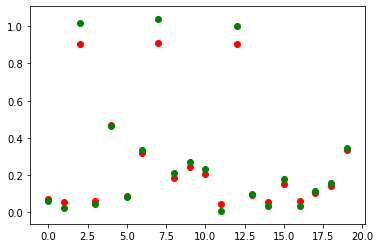

In [194]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

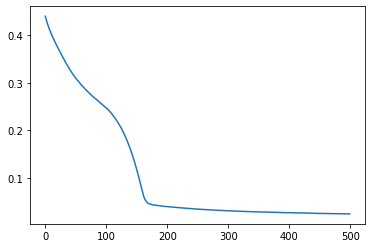

In [195]:
plt.plot(history.history['loss'])
plt.show()
